In [63]:
import pandas as pd
df = pd.read_csv('C:\\users\\mirid\\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

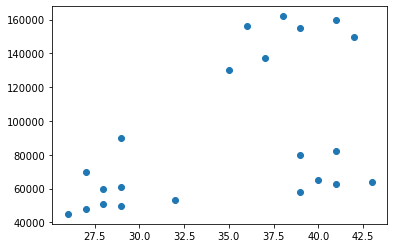

In [6]:
plt.scatter(df['Age'],df['Income($)'])

In [67]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [68]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
df['cluster'] = y_predicted

In [70]:
df0 = df[df.cluster==0]

In [13]:
df0

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


In [71]:
df1 = df[df.cluster==1]
df1

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


No handles with labels found to put in legend.


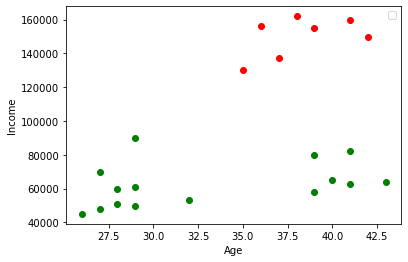

In [72]:
plt.scatter(df0.Age, df0['Income($)'],color='green')
plt.scatter(df1.Age, df1['Income($)'],color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [73]:
km.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

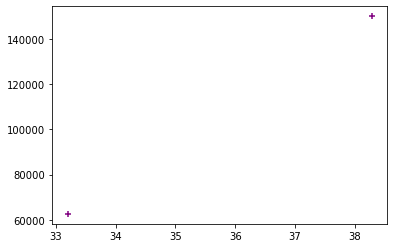

In [74]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='+')

In [75]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\mirid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


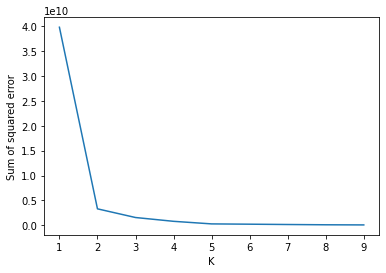

In [76]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [77]:
from sklearn.datasets import load_iris

In [78]:
iris = load_iris()

In [80]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [89]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [92]:
df.rename(columns = {'petal length (cm)':'petal_length'})

,petal_length,petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [95]:
df = df.rename(columns = {'petal width (cm)':'petal_width', 'petal length (cm)':'petal_length'})

In [97]:
df.shape

(150, 2)

In [99]:
km = KMeans(n_clusters=3)

In [102]:
y_predicted = km.fit_predict(df)

In [103]:
df['cluster'] = y_predicted

In [104]:
df.cluster.unique()

array([1, 0, 2])

In [105]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

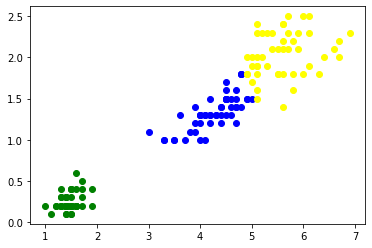

In [107]:
plt.scatter(df1['petal_length'],df1['petal_width'],color='blue')
plt.scatter(df2['petal_length'],df2['petal_width'],color='green')
plt.scatter(df3['petal_length'],df3['petal_width'],color='yellow')

In [109]:
sse =[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\mirid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


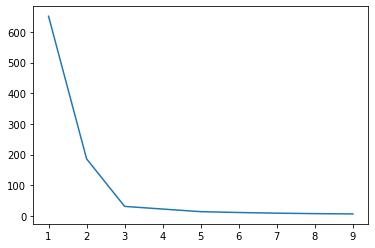

In [110]:
plt.plot(k_rng,sse)